In [16]:
# List any trends that you are interested in finding in the below cells.
# If you open this file, please create the other diagrams missing.

In [17]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
csv_file = "merged_df.csv"
merged_df = pd.read_csv(csv_file)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

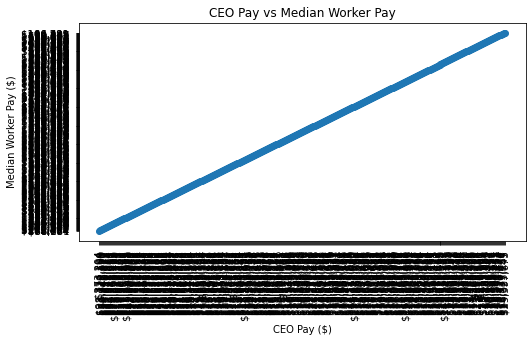

In [48]:
# Trend in Ceo pay vs Median Income

#Taking the dollar and comma symbols out of the numbers before the graph reads them.
x_values = merged_df["CEO Salary"].str.replace(',', '').str.replace("$", "").astype(int)
y_values = merged_df['Median Worker Pay'].str.replace(',', '').str.replace("$", "").astype(int)

plt.figure(figsize = (8,4))
plt.scatter(x_values,y_values)
plt.xlabel("CEO Pay ($)")
plt.ylabel("Median Worker Pay ($)")
plt.title("CEO Pay vs Median Worker Pay")
plt.xticks(rotation=90)
# Change x axis labels to plain numbers, other option is "scientific"
plt.ticklabel_format(axis='x',style='plain')

# Save the figure
#plt.savefig(r"E:/Downloads/Group6_proj1/Visuals/CEOoutrageous.png")

In [20]:
# Group ceo_df by Industry. Compare median or mean CEO pay in categories = industry
# Histogram/bar graph

In [21]:
# Group ceo_df by Industry. Compare median or mean median income in categories = industry
# Histogram/bar graph

In [22]:
# Trend in Ceo pay (ceo_df) vs Revenue (revenue_df)

In [23]:
# Find value per employee (revenue_df) and trend with CEO pay